## scQuint Data Preprocessing

In [22]:
##processing pipeline of cellxSJ matric StarSolo output for use with scQuint. Scripts by Gonzalo Benegas

In [23]:
!date

Fri Jan 27 14:16:27 PST 2023


In [24]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/squint_2


In [25]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scanpy as sc
import seaborn as sns
from umap import UMAP

from scquint.data import add_gene_annotation, group_introns, load_adata_from_starsolo

In [26]:
output_dir = '/c4/home/derek/data1/derek/data_scSLR/PBMC/'
os.makedirs(output_dir, exist_ok=True)

### Load Gene Expression Anndata

In [27]:
# we will extract obs and X_umap
adata_exp = anndata.read_h5ad("/c4/home/derek/data1/derek/data_scSLR/PBMC/gene_expression.h5ad")
adata_exp

AnnData object with n_obs × n_vars = 20673 × 18450
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'feature_types', 'genome', 'gene

In [28]:
adata_exp.obs.donor.cat.categories

Index(['ICC_C_0001', 'ICC_C_0003', 'Rep_C_1002', 'Rep_C_1003', 'Rep_C_1005',
       'Rep_C_1014', 'Rep_C_1023', 'Rep_C_1024', 'Rep_C_1025', 'Rep_C_1031',
       'Rep_C_1033', 'Rep_C_1037', 'Rep_C_1039', 'Rep_C_1044', 'Rep_C_1045',
       'Rep_C_1047', 'Rep_C_1050', 'Rep_C_1051', 'Rep_C_1052', 'Rep_C_1053',
       'Rep_C_1059', 'Rep_C_1062'],
      dtype='object')

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


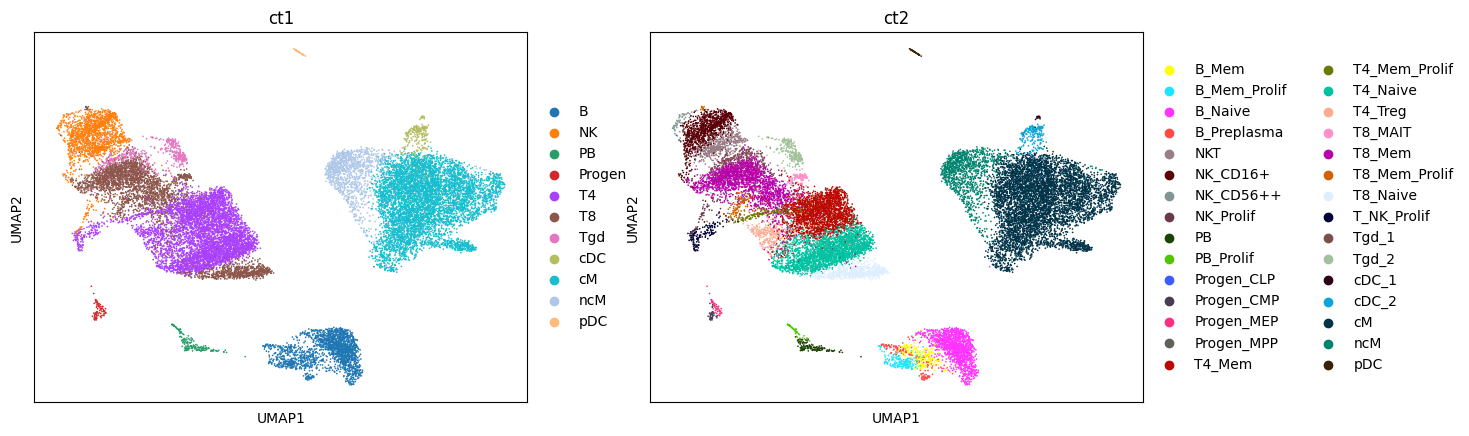

In [29]:
sc.pl.umap(adata_exp,
           color=['ct1','ct2']
          )

### Load Splice Junction Matricies into scQuint

In [30]:
input_dir = "/nowakowskilab/data1/derek/data_scSLR/PBMC/STAR_outs/"

In [31]:
adatas_spl = {}
samples = ["sample_1", "sample_2"]
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut_merged/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut_merged/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    adatas_spl[sample] = adata_spl_sample

sample_1
Filtering out undefined strand.
sample_2
Filtering out undefined strand.


In [32]:
adata_spl = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl

AnnData object with n_obs × n_vars = 1474560 × 415831
    var: 'chromosome', 'start', 'end', 'strand', 'intron_motif'

In [33]:
##fix obs names
adata_spl.obs_names = adata_spl.obs_names.str.replace('-sample_1','-1-22').str.replace('-sample_2','-1-23')

In [34]:
adata_spl = adata_spl[adata_exp.obs.index.values]
adata_spl.obs = adata_exp.obs
adata_spl.obsm["X_umap"] = adata_exp.obsm["X_umap"]
adata_spl

AnnData object with n_obs × n_vars = 20673 × 415831
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'chromosome', 'start', 'end', '

In [35]:
sc.pp.filter_genes(adata_spl, min_cells=100)
chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]
adata_spl = adata_spl[:, adata_spl.var.chromosome.isin(chromosomes)]

In [36]:
%%time
##add annotations

gtf_path = '/c4/home/derek/data1/HDD-2/derek/reference/human_hp3_reference/genes/genes.gtf'
filter_unique_gene=True
    
gtf = pd.read_csv(
    gtf_path,
    sep="\t",
    header=None,
    comment="#",
    names=[
        "chromosome",
        "source",
        "feature",
        "start",
        "end",
        "score",
        "strand",
        "frame",
        "attribute",
    ],
)

gtf = gtf[gtf.feature == "exon"]
gtf["gene_id"] = gtf.attribute.str.extract(r'gene_id "([^;]*)";')
gtf["gene_name"] = gtf.attribute.str.extract(r'gene_name "([^;]*)";')
#gtf.chromosome = "chr" + gtf.chromosome.astype(str)

gene_id_name = gtf[["gene_id", "gene_name"]].drop_duplicates()

exon_starts = (
    gtf[["chromosome", "start", "gene_id"]].copy().rename(columns={"start": "pos"})
)
exon_starts.pos -= 1
exon_ends = (
    gtf[["chromosome", "end", "gene_id"]].copy().rename(columns={"end": "pos"})
)
exon_ends.pos += 1
exon_boundaries = pd.concat(
    [exon_starts, exon_ends], ignore_index=True
).drop_duplicates()

genes_by_exon_boundary = exon_boundaries.groupby(
    ["chromosome", "pos"]
).gene_id.unique()

adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "start"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_start"})
    .set_index(adata_spl.var.index)
)
adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "end"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_end"})
    .set_index(adata_spl.var.index)
)

def fill_na_with_empty_array(val):
    return val if isinstance(val, np.ndarray) else np.array([])

adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(fill_na_with_empty_array)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(fill_na_with_empty_array)

adata_spl.var["gene_id_list"] = adata_spl.var.apply(
    lambda row: np.unique(np.concatenate([row.gene_id_start, row.gene_id_end])),
    axis=1,
)
adata_spl.var["n_genes"] = adata_spl.var.gene_id_list.apply(len)
adata_spl.var.gene_id_list = adata_spl.var.gene_id_list.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(
    lambda x: ",".join(x.tolist())
)

if filter_unique_gene:
    print("Filtering to introns associated to 1 and only 1 gene.")
    adata_spl = adata_spl[:, adata_spl.var.n_genes == 1]
    adata_spl.var["gene_id"] = adata_spl.var.gene_id_list
    adata_spl.var.drop(columns=["gene_id_list",], inplace=True)
    adata_spl.var = adata_spl.var.merge(gene_id_name, how="left", on="gene_id").set_index(
        adata_spl.var.index
    )
    adata_spl.var.index = adata_spl.var.gene_name.astype(str) + "_" + adata_spl.var.index.astype(str)




Filtering to introns associated to 1 and only 1 gene.


<timed exec>:92: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


CPU times: user 3min 4s, sys: 8.24 s, total: 3min 12s
Wall time: 3min 11s


In [37]:
def group_introns(adata, by="three_prime", filter_unique_gene_per_group=True):
    if by == "three_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.end) if intron.strand == "+" else str(intron.start))
            + "_"
            + intron.strand,
            axis=1,
        )
    elif by == "five_prime":
        adata.var["intron_group"] = adata.var.apply(
            lambda intron: intron.chromosome
            + "_"
            + (str(intron.start) if intron.strand == "+" else str(intron.end))
            + "_"
            + intron.strand,
            axis=1,
        )        
    elif by == "gene":
        adata.var["intron_group"] = adata.var.gene_id
    else:
        raise Exception(f"Grouping by {by} not yet supported.")

    intron_group_sizes = (
        adata.var.intron_group.value_counts()
        .to_frame()
        .rename(columns={"intron_group": "intron_group_size"})
    )
    adata.var = adata.var.merge(
        intron_group_sizes, how="left", left_on="intron_group", right_index=True
    ).set_index(adata.var.index)
    print("Filtering singletons.")
    adata = adata[:, adata.var.intron_group_size > 1]


    if filter_unique_gene_per_group:
        print("Filtering intron groups associated with more than 1 gene.")
        n_genes_per_intron_group = adata.var.groupby("intron_group").gene_id.nunique().to_frame().rename(columns={"gene_id": "n_genes_per_intron_group"})
        adata.var = adata.var.merge(n_genes_per_intron_group, how="left", left_on="intron_group", right_index=True)
        adata = adata[:, adata.var.n_genes_per_intron_group==1]
        adata.var.intron_group = adata.var.gene_name.astype(str) + "_" + adata.var.intron_group.astype(str)

    return adata

In [45]:
adata_spl_3p = adata_spl.copy()

In [46]:
adata_spl_3p = group_introns(adata_spl_3p, by="three_prime")



Filtering singletons.
Filtering intron groups associated with more than 1 gene.


/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  self[name] = value


In [47]:
adata_spl_5p = adata_spl.copy()

In [48]:
adata_spl_5p = group_introns(adata_spl_5p, by="five_prime")



Filtering singletons.
Filtering intron groups associated with more than 1 gene.


/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  self[name] = value


In [49]:
adata_spl_3p

AnnData object with n_obs × n_vars = 20673 × 3282
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'chromosome', 'start', 'end', 'st

In [50]:
adata_spl_5p

AnnData object with n_obs × n_vars = 20673 × 3478
    obs: 'n_counts_mrna', 'n_counts_adts', 'NUM.SNPS', 'NUM.READS', 'DROPLET.TYPE', 'BEST.GUESS', 'percent_mito', 'pool', 'well', 'pool_well', 'batch', 'pool_clust', 'freemux_cluster', 'donor', 'timepoint', 'respiratory_support_D0', 'onset_to_D0_days', 'intubated_days', 'admission_to_discharge', 'D0_to_death', 'race', 'sex', 'ethnicity', 'consent', 'death', 'pulmonary_infection', 'non_pulmonary_infection', 'leiden', 'onset_to_D0_days-as_float', 'D0_to_death-as_float', 'original_leiden', 'ct1', 'ct2', 'ct3', 'RBC', 'WBC_count1', 'WBC_count2', 'WBC_count3', 'Lymphocyte_count', 'Monocyte_count', 'cell_group', 'exclude_restricted', 'IFN_shared_score', 'IFN_beta_score', 'IFN_gamma_score', 'actual_timepoint', 'CT_1', 'CT_2', 'CT_Host', 'dCT_1', 'dCT_2', 'days_from_start', 'COVID_status', 'admission_level', 'respiratory_support', 'NIH_clinical', 'COVID_severity', 'COVID_severity_merged', 'NIH_ordinal'
    var: 'chromosome', 'start', 'end', 'st

/c4/home/derek/miniconda3/envs/squint_2/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [56]:
adata_spl_3p.var['grouping_metric'] = '3prime'
adata_spl_5p.var['grouping_metric'] = '5prime'

adata_spl_3p.var_names = adata_spl_3p.var_names + '_3prime'
adata_spl_5p.var_names = adata_spl_5p.var_names + '_5prime'

In [57]:
adata = sc.concat([adata_spl_3p,adata_spl_5p],axis=1, merge='same')

In [60]:
temp = adata.var.copy()

temp = temp.sort_values(by=['chromosome','start'])

temp

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping_metric
CDK11A_chr1:1721712-1722587_3prime,chr1,1721712,1722587,-,2,124,ENSG00000008128,ENSG00000008128,1,ENSG00000008128,CDK11A,CDK11A_chr1_1721712_-,2,1,3prime
CDK11A_chr1:1721712-1722707_3prime,chr1,1721712,1722707,-,2,193,ENSG00000008128,ENSG00000008128,1,ENSG00000008128,CDK11A,CDK11A_chr1_1721712_-,2,1,3prime
FAAP20_chr1:2193911-2193997_3prime,chr1,2193911,2193997,-,2,928,ENSG00000162585,ENSG00000162585,1,ENSG00000162585,FAAP20,FAAP20_chr1_2193911_-,2,1,3prime
FAAP20_chr1:2193911-2194027_3prime,chr1,2193911,2194027,-,2,100,ENSG00000162585,,1,ENSG00000162585,FAAP20,FAAP20_chr1_2193911_-,2,1,3prime
RER1_chr1:2391959-2395783_3prime,chr1,2391959,2395783,+,1,1542,ENSG00000157916,ENSG00000157916,1,ENSG00000157916,RER1,RER1_chr1_2395783_+,2,1,3prime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RPL10_chrX:154400627-154400719_5prime,chrX,154400627,154400719,+,1,586,ENSG00000147403,,1,ENSG00000147403,RPL10,RPL10_chrX_154400627_+,3,1,5prime
DDX3Y_chrY:12909408-12912726_3prime,chrY,12909408,12912726,+,1,150,ENSG00000067048,ENSG00000067048,1,ENSG00000067048,DDX3Y,DDX3Y_chrY_12912726_+,2,1,3prime
DDX3Y_chrY:12909408-12911838_5prime,chrY,12909408,12911838,+,1,273,ENSG00000067048,ENSG00000067048,1,ENSG00000067048,DDX3Y,DDX3Y_chrY_12909408_+,2,1,5prime
DDX3Y_chrY:12909408-12912726_5prime,chrY,12909408,12912726,+,1,150,ENSG00000067048,ENSG00000067048,1,ENSG00000067048,DDX3Y,DDX3Y_chrY_12909408_+,2,1,5prime


In [64]:
temp.head(50)

,chromosome,start,end,strand,intron_motif,n_cells,gene_id_start,gene_id_end,n_genes,gene_id,gene_name,intron_group,intron_group_size,n_genes_per_intron_group,grouping_metric
CDK11A_chr1:1721712-1722587_3prime,chr1,1721712,1722587,-,2,124,ENSG00000008128,ENSG00000008128,1,ENSG00000008128,CDK11A,CDK11A_chr1_1721712_-,2,1,3prime
CDK11A_chr1:1721712-1722707_3prime,chr1,1721712,1722707,-,2,193,ENSG00000008128,ENSG00000008128,1,ENSG00000008128,CDK11A,CDK11A_chr1_1721712_-,2,1,3prime
FAAP20_chr1:2193911-2193997_3prime,chr1,2193911,2193997,-,2,928,ENSG00000162585,ENSG00000162585,1,ENSG00000162585,FAAP20,FAAP20_chr1_2193911_-,2,1,3prime
FAAP20_chr1:2193911-2194027_3prime,chr1,2193911,2194027,-,2,100,ENSG00000162585,,1,ENSG00000162585,FAAP20,FAAP20_chr1_2193911_-,2,1,3prime
RER1_chr1:2391959-2395783_3prime,chr1,2391959,2395783,+,1,1542,ENSG00000157916,ENSG00000157916,1,ENSG00000157916,RER1,RER1_chr1_2395783_+,2,1,3prime
RER1_chr1:2391959-2393269_5prime,chr1,2391959,2393269,+,1,185,ENSG00000157916,,1,ENSG00000157916,RER1,RER1_chr1_2391959_+,2,1,5prime
RER1_chr1:2391959-2395783_5prime,chr1,2391959,2395783,+,1,1542,ENSG00000157916,ENSG00000157916,1,ENSG00000157916,RER1,RER1_chr1_2391959_+,2,1,5prime
RER1_chr1:2393356-2395783_3prime,chr1,2393356,2395783,+,1,205,,ENSG00000157916,1,ENSG00000157916,RER1,RER1_chr1_2395783_+,2,1,3prime
CAMTA1_chr1:6785576-6825091_3prime,chr1,6785576,6825091,+,1,355,ENSG00000171735,ENSG00000171735,1,ENSG00000171735,CAMTA1,CAMTA1_chr1_6825091_+,2,1,3prime
CAMTA1_chr1:6785576-6820180_5prime,chr1,6785576,6820180,+,1,1384,ENSG00000171735,ENSG00000171735,1,ENSG00000171735,CAMTA1,CAMTA1_chr1_6785576_+,2,1,5prime


In [ ]:
#adata_spl.write_h5ad(output_dir+'spl_3prime_splice_acceptor.h5ad')

### Generate matrix for 5' reads only for comparisons

In [ ]:
input_dir = "/nowakowskilab/data1/derek/data_scSLR/PBMC/STAR_outs/"

In [ ]:
adatas_spl = {}
samples = ["sample_1", "sample_2"]
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut_5prime/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/{sample}/StarOut_5prime/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    adatas_spl[sample] = adata_spl_sample

In [ ]:
adata_spl = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl

In [ ]:
##fix obs names
adata_spl.obs_names = adata_spl.obs_names.str.replace('-sample_1','-1-22').str.replace('-sample_2','-1-23')

In [ ]:
adata_spl = adata_spl[adata_exp.obs.index.values]
adata_spl.obs = adata_exp.obs
adata_spl.obsm["X_umap"] = adata_exp.obsm["X_umap"]
adata_spl

In [ ]:
sc.pp.filter_genes(adata_spl, min_cells=100)
chromosomes = [f"chr{i}" for i in range(1, 23)] + ["chrX", "chrY"]
adata_spl = adata_spl[:, adata_spl.var.chromosome.isin(chromosomes)]

In [ ]:
%%time
##add annotations

gtf_path = '/c4/home/derek/data1/HDD-2/derek/reference/human_hp3_reference/genes/genes.gtf'
filter_unique_gene=True
    
gtf = pd.read_csv(
    gtf_path,
    sep="\t",
    header=None,
    comment="#",
    names=[
        "chromosome",
        "source",
        "feature",
        "start",
        "end",
        "score",
        "strand",
        "frame",
        "attribute",
    ],
)

gtf = gtf[gtf.feature == "exon"]
gtf["gene_id"] = gtf.attribute.str.extract(r'gene_id "([^;]*)";')
gtf["gene_name"] = gtf.attribute.str.extract(r'gene_name "([^;]*)";')
#gtf.chromosome = "chr" + gtf.chromosome.astype(str)

gene_id_name = gtf[["gene_id", "gene_name"]].drop_duplicates()

exon_starts = (
    gtf[["chromosome", "start", "gene_id"]].copy().rename(columns={"start": "pos"})
)
exon_starts.pos -= 1
exon_ends = (
    gtf[["chromosome", "end", "gene_id"]].copy().rename(columns={"end": "pos"})
)
exon_ends.pos += 1
exon_boundaries = pd.concat(
    [exon_starts, exon_ends], ignore_index=True
).drop_duplicates()

genes_by_exon_boundary = exon_boundaries.groupby(
    ["chromosome", "pos"]
).gene_id.unique()

adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "start"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_start"})
    .set_index(adata_spl.var.index)
)
adata_spl.var = (
    adata_spl.var.merge(
        genes_by_exon_boundary,
        how="left",
        left_on=["chromosome", "end"],
        right_on=["chromosome", "pos"],
    )
    .rename(columns={"gene_id": "gene_id_end"})
    .set_index(adata_spl.var.index)
)

def fill_na_with_empty_array(val):
    return val if isinstance(val, np.ndarray) else np.array([])

adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(fill_na_with_empty_array)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(fill_na_with_empty_array)

adata_spl.var["gene_id_list"] = adata_spl.var.apply(
    lambda row: np.unique(np.concatenate([row.gene_id_start, row.gene_id_end])),
    axis=1,
)
adata_spl.var["n_genes"] = adata_spl.var.gene_id_list.apply(len)
adata_spl.var.gene_id_list = adata_spl.var.gene_id_list.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_start = adata_spl.var.gene_id_start.apply(
    lambda x: ",".join(x.tolist())
)
adata_spl.var.gene_id_end = adata_spl.var.gene_id_end.apply(
    lambda x: ",".join(x.tolist())
)

if filter_unique_gene:
    print("Filtering to introns associated to 1 and only 1 gene.")
    adata_spl = adata_spl[:, adata_spl.var.n_genes == 1]
    adata_spl.var["gene_id"] = adata_spl.var.gene_id_list
    adata_spl.var.drop(columns=["gene_id_list",], inplace=True)
    adata_spl.var = adata_spl.var.merge(gene_id_name, how="left", on="gene_id").set_index(
        adata_spl.var.index
    )
    adata_spl.var.index = adata_spl.var.gene_name.astype(str) + "_" + adata_spl.var.index.astype(str)

In [ ]:
adata_spl = group_introns(adata_spl, by="three_prime")
adata_spl

In [ ]:
adata_spl.write_h5ad(output_dir+'5prime_spl_3prime_splice_acceptor.h5ad')

In [ ]:
!conda list